In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from glob import glob

In [19]:
save_figures = True
figures_path = "images" # the path is relative to csv/ folder

In [20]:
# function to read a csv that returns a dataframe with the content of the given csv. The file is searched into the csv/ directory
def read_csv(filename):
    # try to find csv file into subdirectory. If there are many, pick the newest
    files_found = glob(pathname="csv/"+filename)
    if len(files_found) == 0:
        # if not found then we are in the notebook dir and we need to go one level above
        files_found = glob(pathname="../csv/"+filename)

    files_found.sort(key=os.path.getmtime)
    path = files_found[-1]

    print("Reading file", path)
    df = pd.read_csv(path)
    return df

def savefig(figname):
    if not save_figures:
        return
    # try to find csv directory
    files_found = glob(pathname="csv/")
    if len(files_found) == 0:
        path = "../csv"
    else:
        path = "csv"
    
    path = f'{path}/{figures_path}/{figname}.png'

    if not os.path.isdir(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
    plt.savefig(path)

# Summary

In [21]:
df_metadata = read_csv("metadata-*.csv")
df_service_times = pd.DataFrame(df_metadata['service_times'].str.strip("[]").str.split(',').apply(lambda x: [int(i) for i in x])[0])
df_arrival_times = pd.DataFrame(df_metadata['arrival_times'].str.strip("[]").str.split(',').apply(lambda x: [int(i) for i in x])[0])
df_metadata.drop(columns=['service_times', 'arrival_times'], inplace=True)
df_metadata.head()

Reading file ../csv/metadata-1-4-5000-8-1704468376411.csv


,min_num_workers,max_num_workers,initial_num_workers,target_service_time,stream_size
0,1,4,4,8,5000


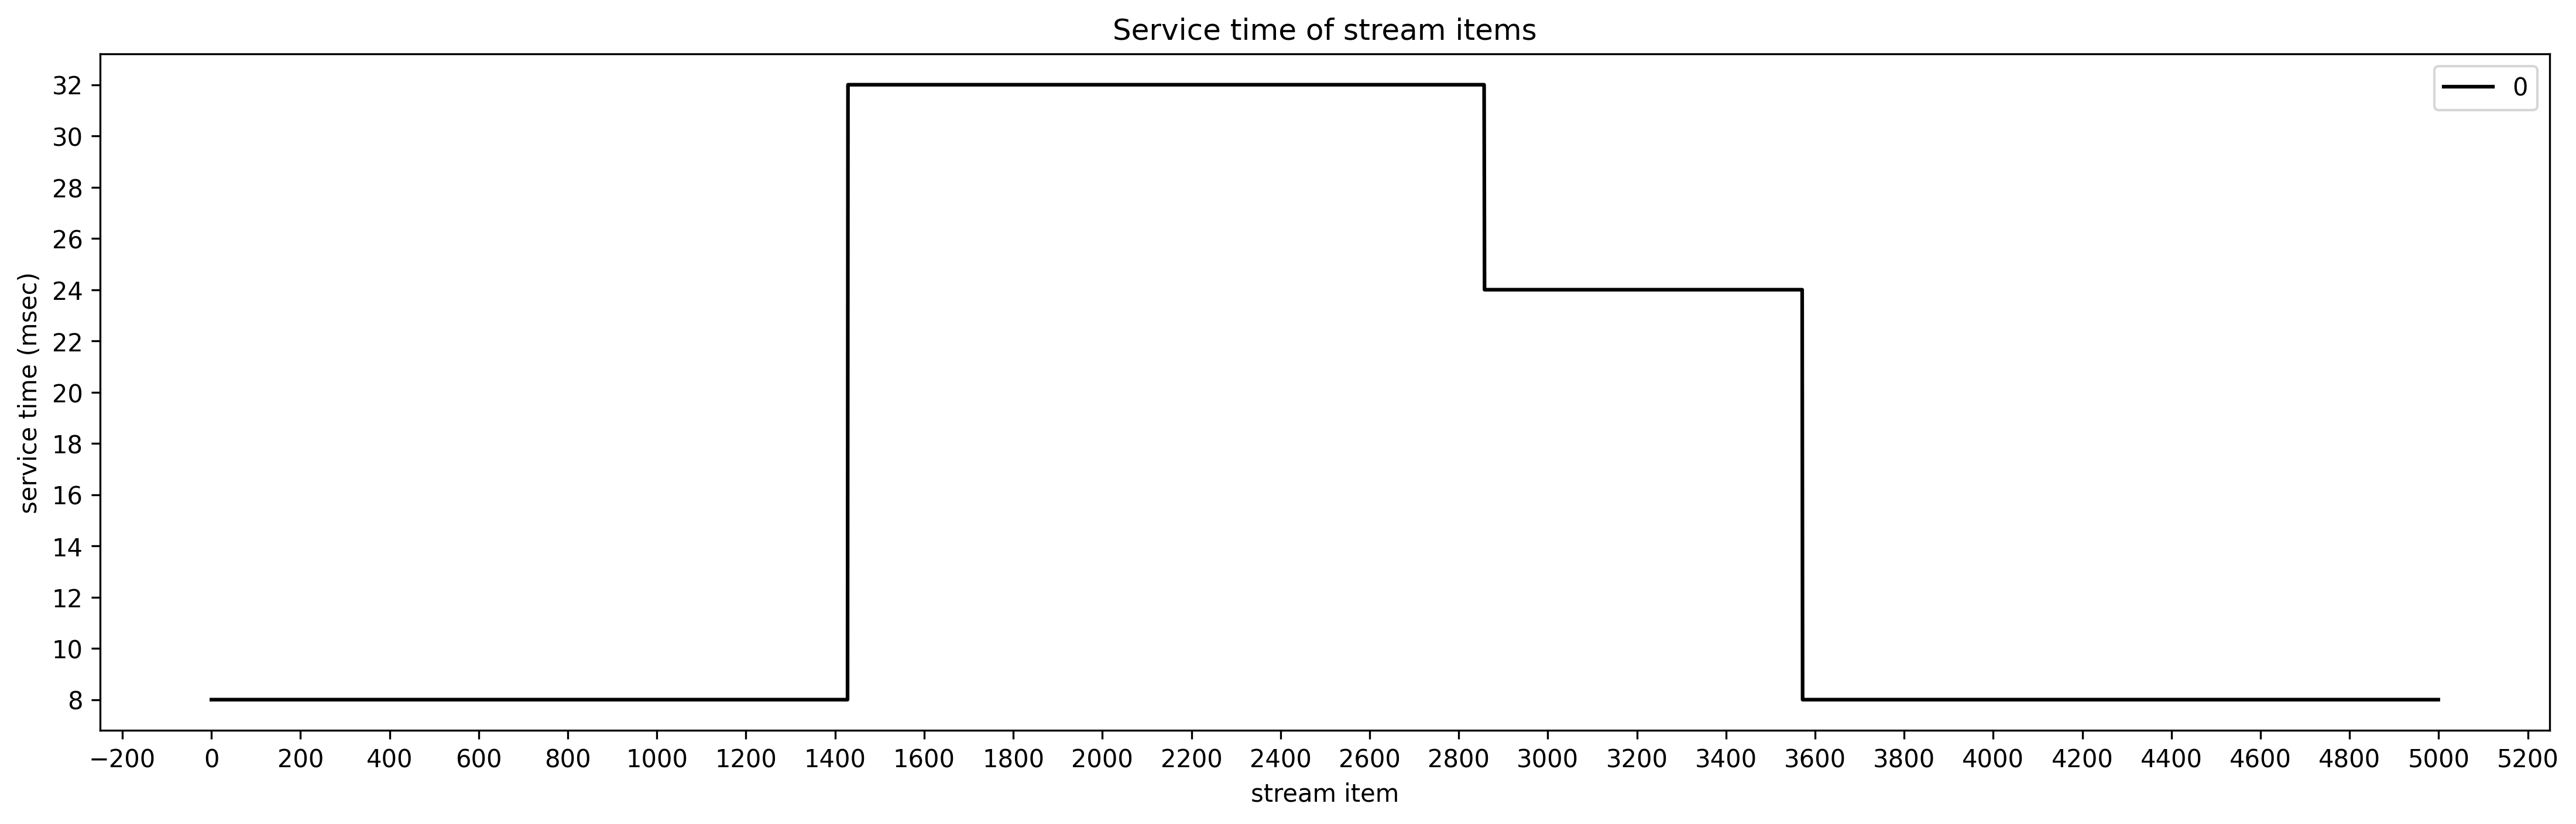

In [22]:
title = f'Service time of stream items'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=30) 
plt.locator_params(axis='y', nbins=16) 
df_service_times.plot(ax=axs, color="black", title=title, label="Service time")

axs.set_xlabel("stream item")
axs.set_ylabel("service time (msec)")

savefig("stream_service_time")
plt.show()

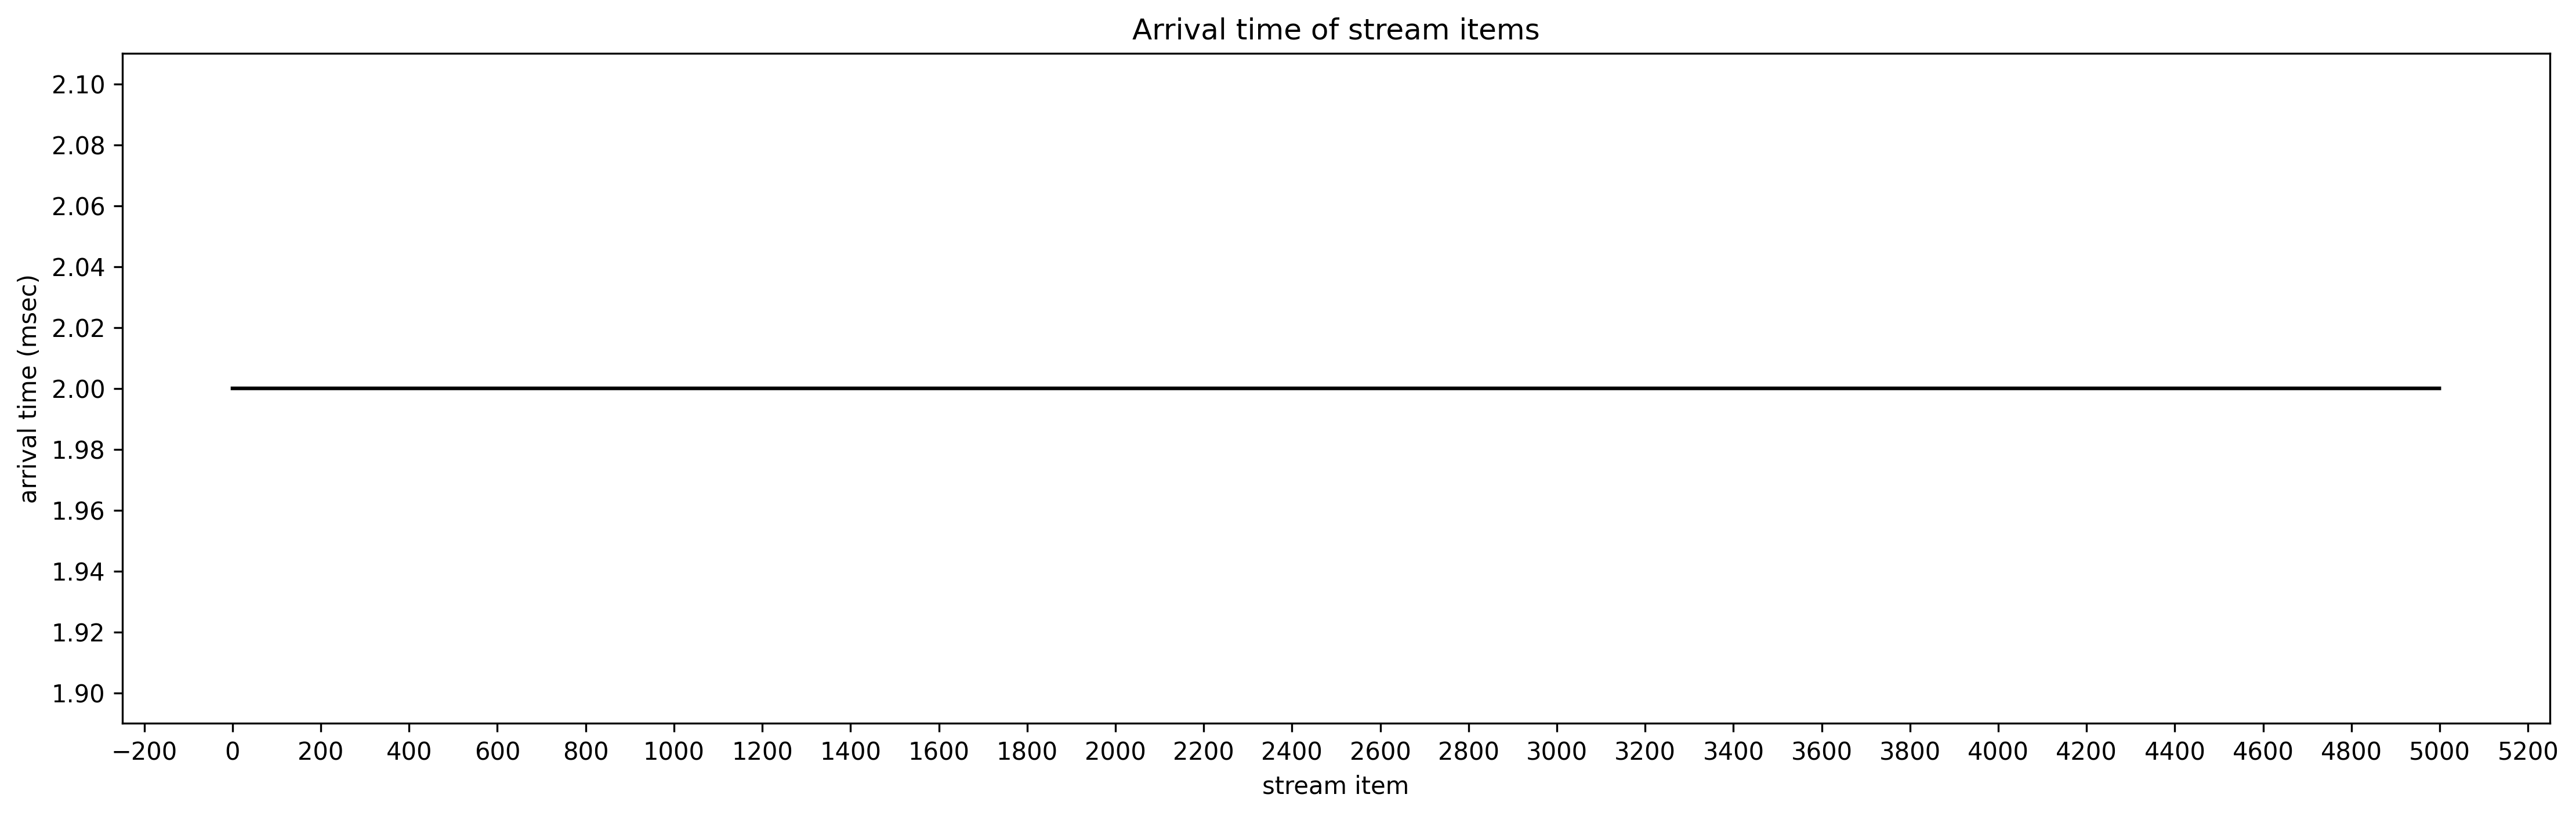

In [23]:
title = f'Arrival time of stream items'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=30) 
plt.locator_params(axis='y', nbins=16) 
df_arrival_times.plot(ax=axs, color="black", title=title, label="Arrival time")

axs.get_legend().remove()
axs.set_xlabel("stream item")
axs.set_ylabel("arrival time (msec)")

plt.show()

In [24]:
df_arrival = read_csv("arrival_time-*.csv")
df_arrival.insert(0, 'count', range(1, 1 + len(df_arrival)))
df_arrival.head()

Reading file ../csv/arrival_time-1-4-5000-8-1704468376411.csv


,count,time
0,1,0
1,2,2
2,3,4
3,4,6
4,5,8


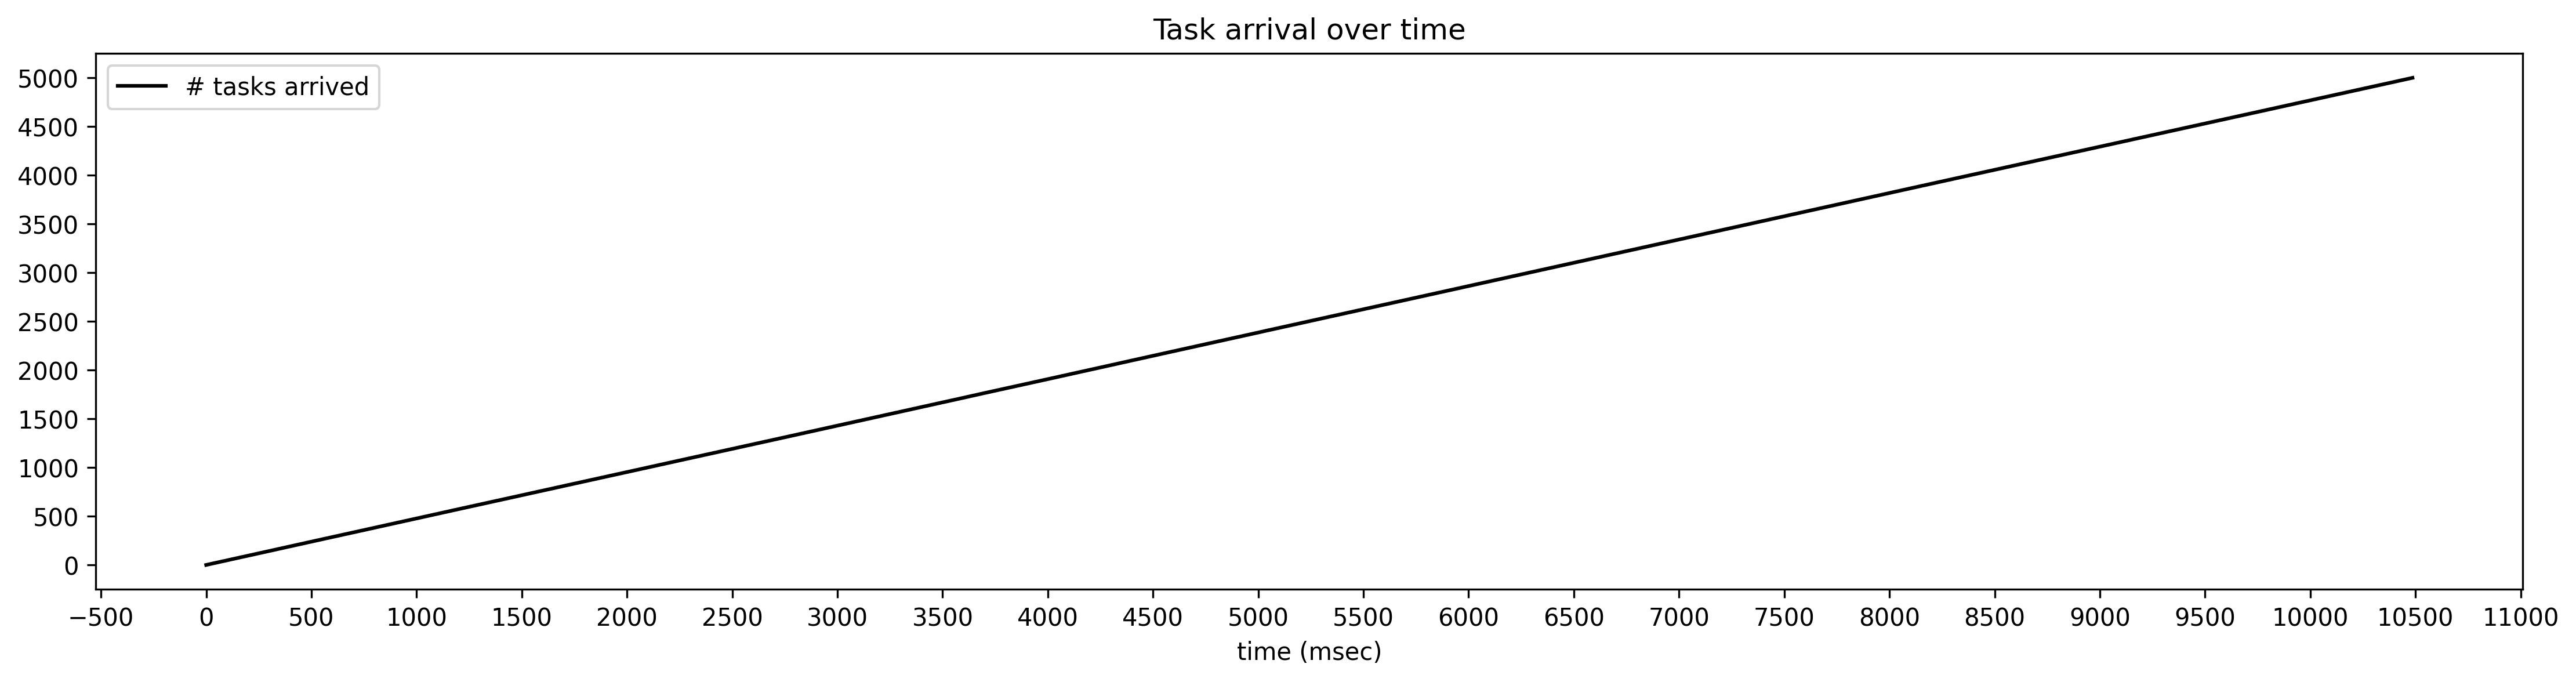

In [25]:

fig, axs = plt.subplots(figsize=(18, 4),dpi=300)
df_arrival.plot(ax=axs, x="time", y="count", color="black", title="Task arrival over time", label="# tasks arrived")
axs.set_xlabel("time (msec)")

# Setting the number of ticks
plt.locator_params(axis='x', nbins=25) 
plt.locator_params(axis='y', nbins=16)
plt.show()

# Metrics

### Throughput

In [26]:
df_throughput = read_csv("throughput-*.csv")
df_throughput.describe()

Reading file ../csv/throughput-1-4-5000-8-1704468376411.csv


,throughput,time
count,4994.000000,4994.000000
mean,0.132311,19793.753304
std,0.037562,11459.070658
min,0.043975,20.000000
25%,0.125000,9786.000000
50%,0.125000,19977.000000
75%,0.129676,29553.000000
max,0.500000,39542.000000


In [27]:
df_throughput_pts = read_csv("throughput_points-*.csv")
df_throughput_pts.describe()

Reading file ../csv/throughput_points-1-4-5000-8-1704468376411.csv


,throughput,time
count,4999.000000,4999.000000
mean,0.132529,19773.969594
std,0.038700,11470.394119
min,0.040541,10.000000
25%,0.125000,9755.000000
50%,0.125000,19945.000000
75%,0.128472,29543.000000
max,0.500000,39542.000000


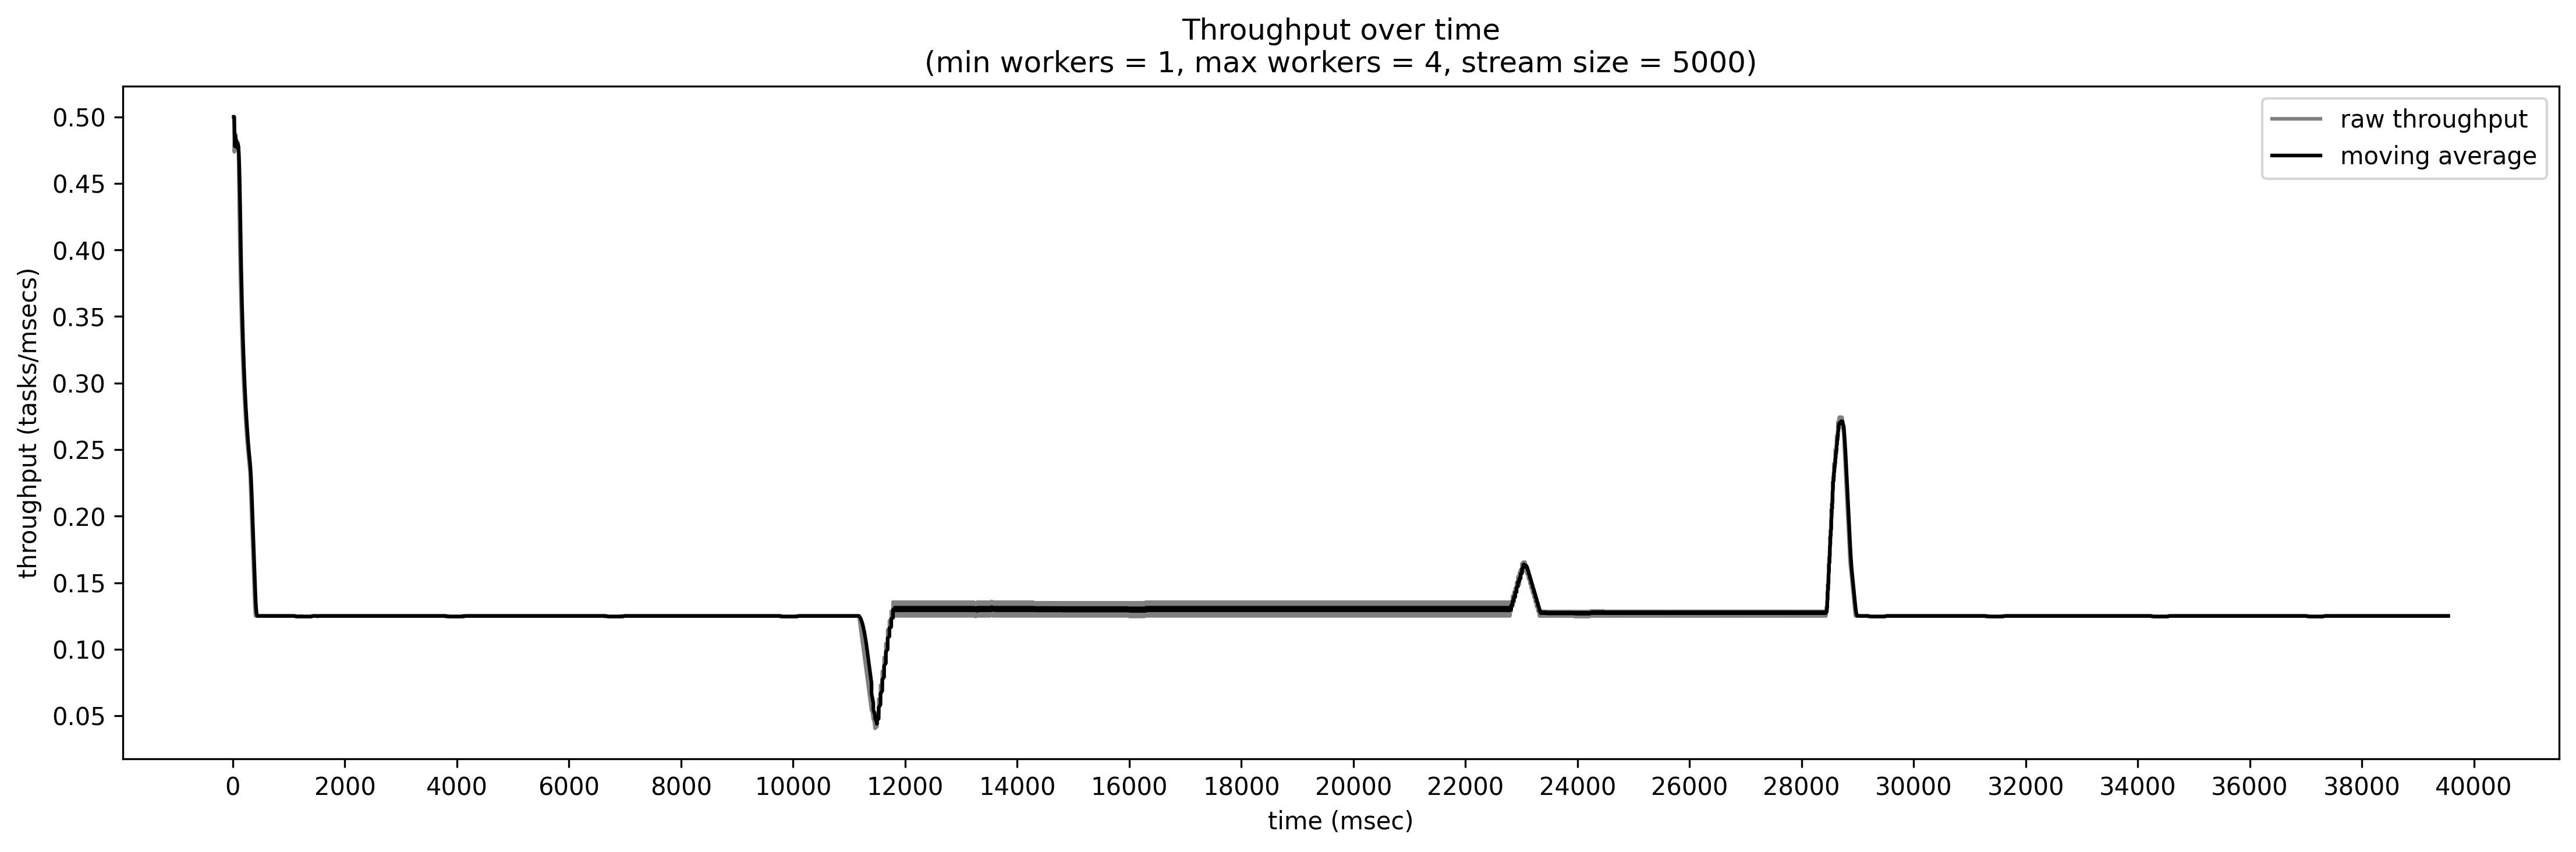

In [28]:
title = f'Throughput over time\n(min workers = {df_metadata["min_num_workers"][0]}, max workers = {df_metadata["max_num_workers"][0]}, stream size = {df_metadata["stream_size"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=30) 
plt.locator_params(axis='y', nbins=16) 
df_throughput_pts.plot(ax=axs, x="time", y="throughput", color="grey", title=title, label="raw throughput")
df_throughput.plot(ax=axs, x="time", y="throughput", color="black", title=title, label="moving average")

axs.set_xlabel("time (msec)")
axs.set_ylabel("throughput (tasks/msecs)")

savefig("farm_throughput")
plt.show()

### Service time

In [29]:
df_servicetime = read_csv("service_time-*.csv")
df_servicetime.describe()

Reading file ../csv/service_time-1-4-5000-8-1704468376411.csv


,servicetime,time
count,4994.000000,4994.000000
mean,7.795308,19793.753304
std,1.064168,11459.070658
min,2.000000,20.000000
25%,7.716620,9786.000000
50%,8.000000,19977.000000
75%,8.000000,29553.000000
max,22.832200,39542.000000


In [30]:
df_servicetime_pts = read_csv("service_time_points-*.csv")
df_servicetime_pts.describe()

Reading file ../csv/service_time_points-1-4-5000-8-1704468376411.csv


,servicetime,time
count,4999.000000,4999.000000
mean,7.791911,19773.969594
std,1.087645,11470.394119
min,2.000000,10.000000
25%,7.783780,9755.000000
50%,8.000000,19945.000000
75%,8.000000,29543.000000
max,24.666700,39542.000000


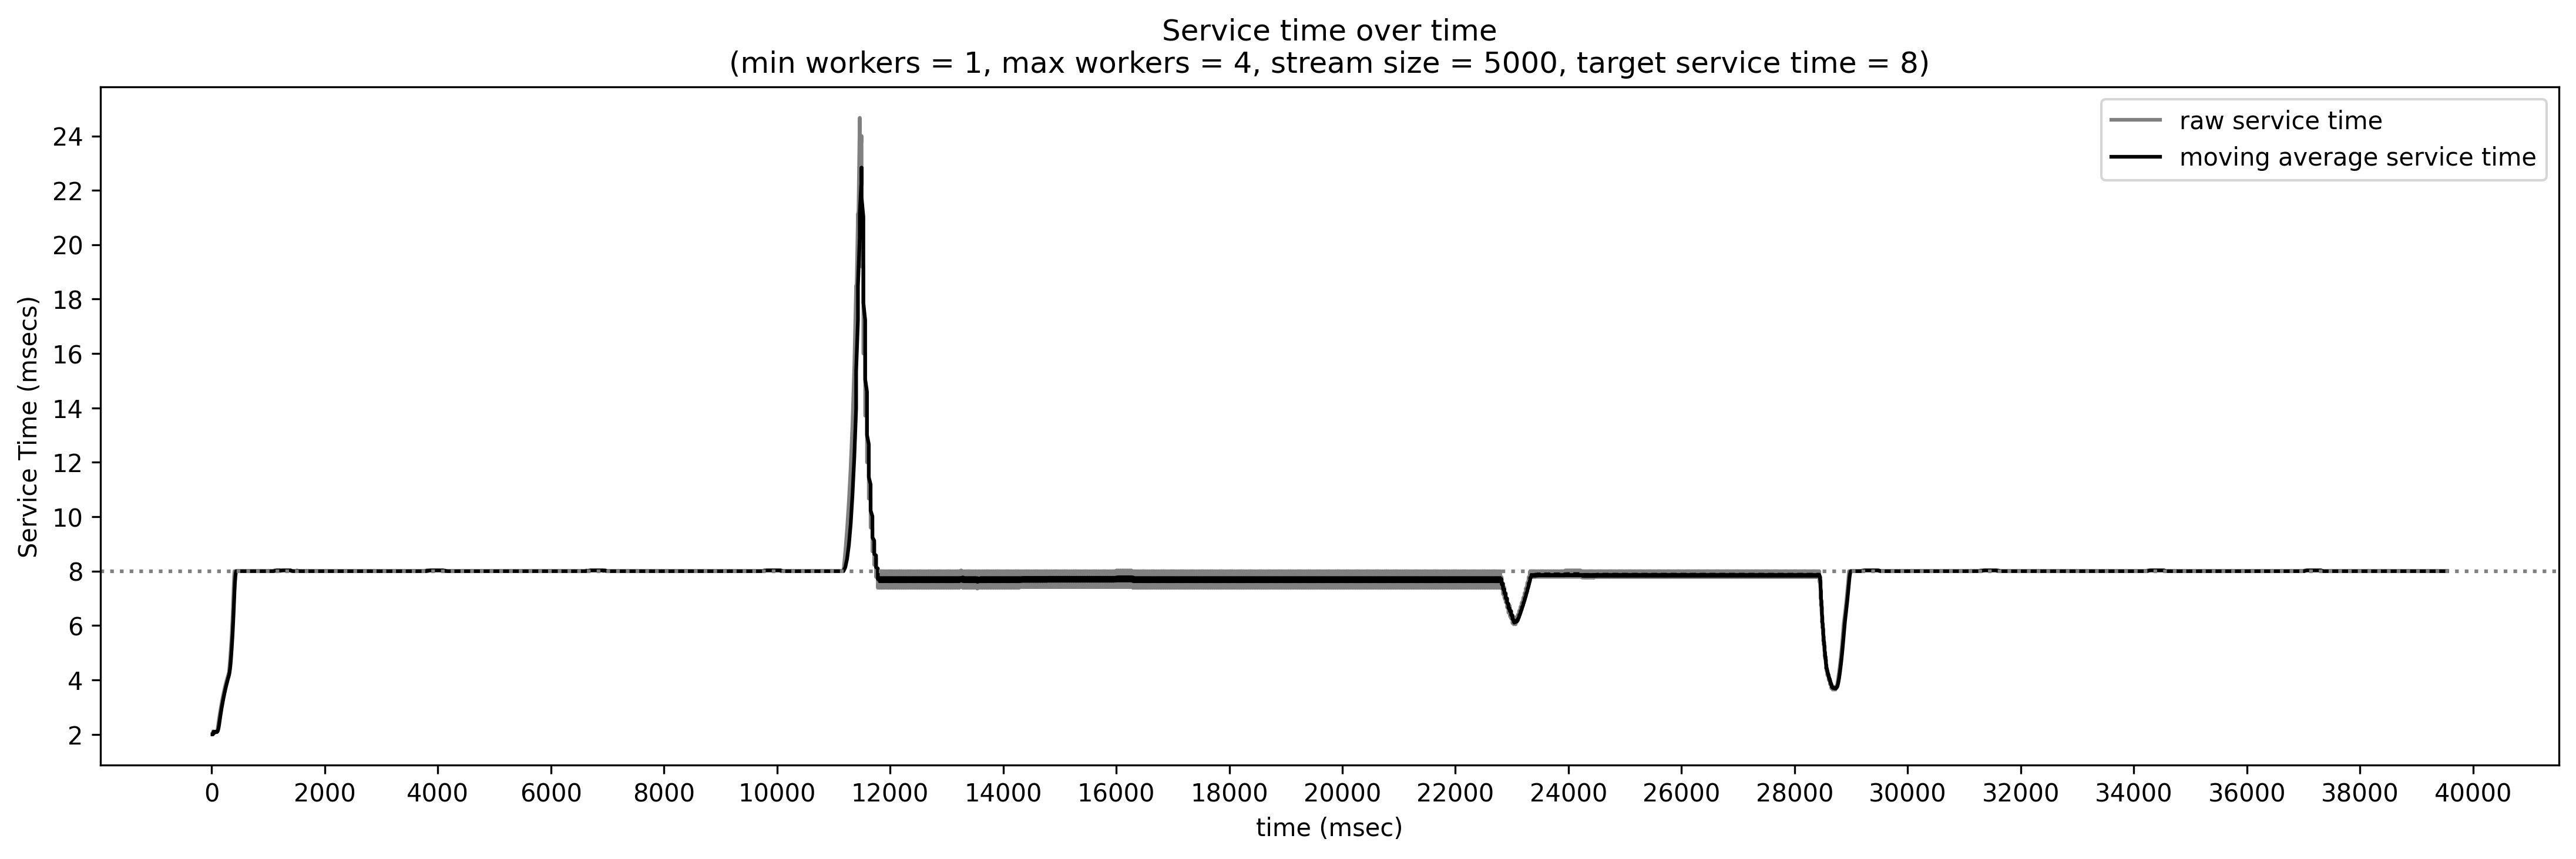

In [31]:
title = f'Service time over time\n(min workers = {df_metadata["min_num_workers"][0]}, max workers = {df_metadata["max_num_workers"][0]}, stream size = {df_metadata["stream_size"][0]}, target service time = {df_metadata["target_service_time"][0]})'

fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
df_servicetime_pts.plot(ax=axs, x="time", y="servicetime", color="grey", title=title, label="raw service time")
df_servicetime.plot(ax=axs, x="time", y="servicetime", color="black", title=title, label="moving average service time")
plt.axhline(y=df_metadata["target_service_time"][0], color='grey', linestyle=':', label="target service time")

axs.set_xlabel("time (msec)")
axs.set_ylabel("Service Time (msecs)")

# Setting the number of ticks
plt.locator_params(axis='x', nbins=25) 
plt.locator_params(axis='y', nbins=14) 

savefig("farm_service_time")
plt.show()

### Number of workers

In [32]:
df_num_workers = read_csv("num_workers-*.csv")
last_timestamp = df_servicetime_pts['time'].iloc[-1]
last_row = list(df_num_workers.iloc[-1])
df_num_workers = pd.concat([df_num_workers, pd.DataFrame([last_row], columns=df_num_workers.columns)], ignore_index=True)
df_num_workers.at[df_num_workers.index[-1],'time'] = df_servicetime_pts['time'].iloc[-1]
df_num_workers.head()

Reading file ../csv/num_workers-1-4-5000-8-1704468376411.csv


,num_workers,time
0,4,0
1,1,92
2,2,11368
3,4,11464
4,3,22985


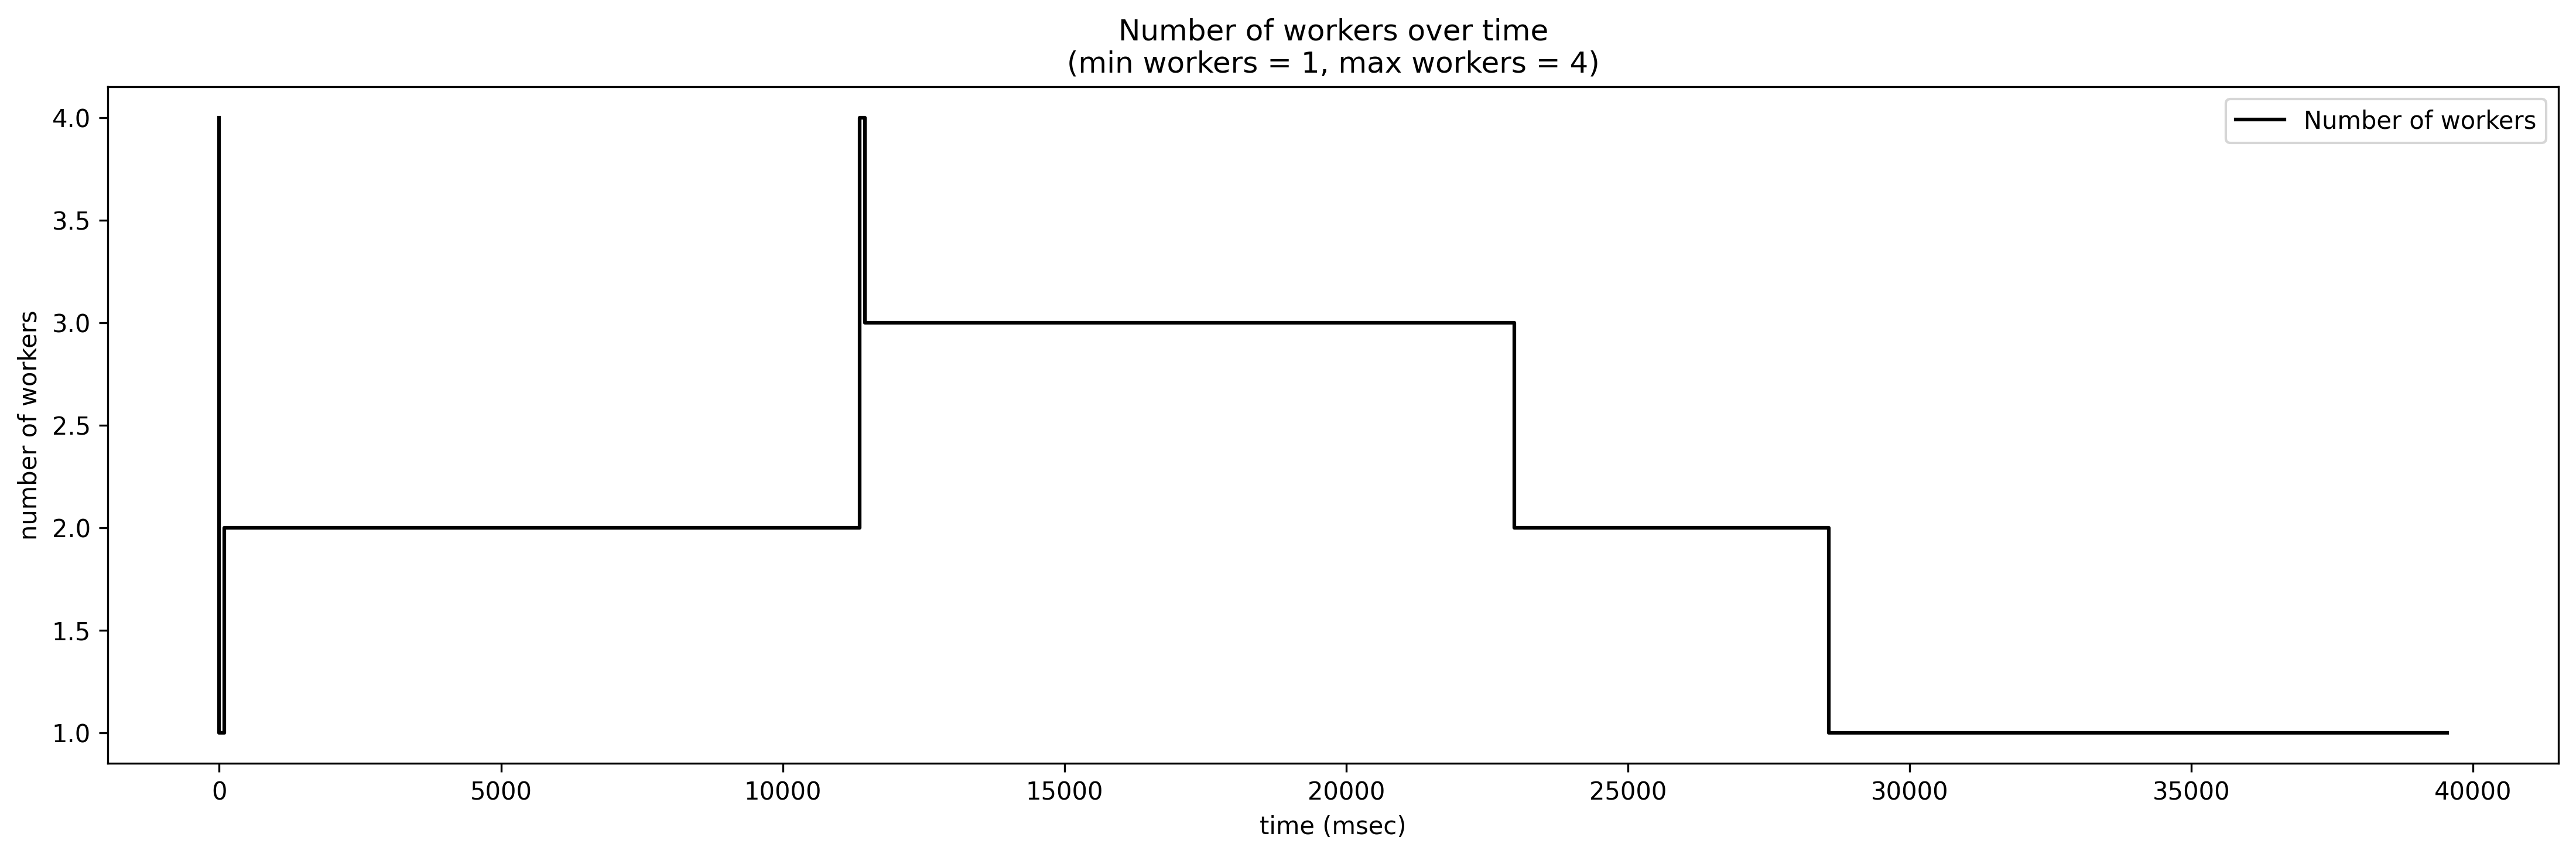

In [33]:
title = f'Number of workers over time\n(min workers = {df_metadata["min_num_workers"][0]}, max workers = {df_metadata["max_num_workers"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
df_num_workers.plot(drawstyle="steps", ax=axs, x="time", y="num_workers", color="black", title=title, label="Number of workers")

axs.set_xlabel("time (msec)")
axs.set_ylabel("number of workers")

savefig("farm_workers")
plt.show()

### Service time and number of workers

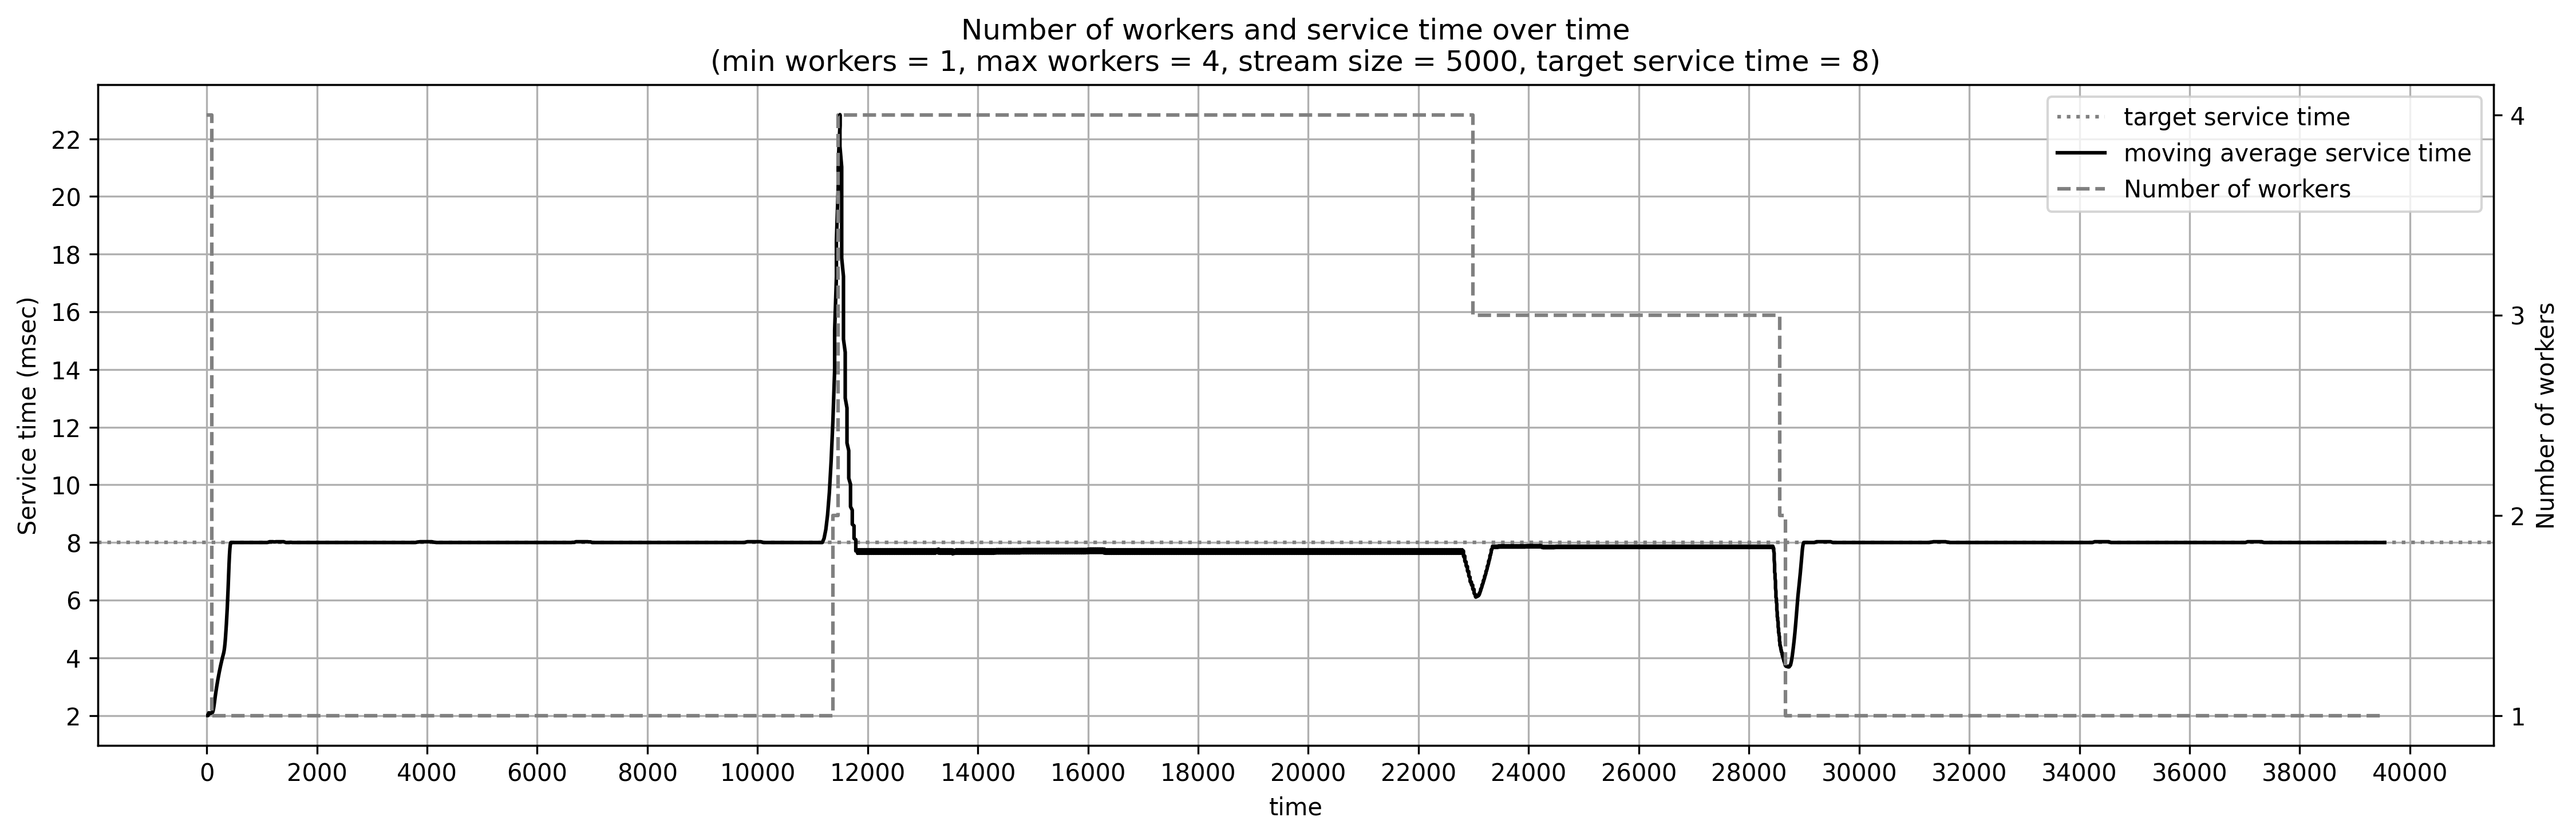

In [34]:
title = f'Number of workers and service time over time\n(min workers = {df_metadata["min_num_workers"][0]}, max workers = {df_metadata["max_num_workers"][0]}, stream size = {df_metadata["stream_size"][0]}, target service time = {df_metadata["target_service_time"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# plot target service time now so it is in the main axis
plt.axhline(y=df_metadata["target_service_time"][0], color='grey', linestyle=':', label="target service time")

ax2 = axs.twinx()

axs.set_xlabel("time (msec)")
axs.set_ylabel("Service time (msec)")
df_servicetime.plot(ax=axs, x="time", y="servicetime", color="black", title=title, label="moving average service time")

ax2.set_ylabel('Number of workers')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
df_num_workers.plot(drawstyle="steps-post", ax=ax2, x="time", y="num_workers", color="grey", label="Number of workers", linestyle='--')

axs.locator_params(axis='x', nbins=26) # Setting the number of ticks
axs.locator_params(axis='y', nbins=14) # Setting the number of ticks
ax2.locator_params(axis='y', nbins=24)
axs.grid()
h1, l1 = axs.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
axs.legend(h1+h2, l1+l2, loc=1)
ax2.get_legend().remove()

savefig("farm_service_time_and_workers")
plt.show()